# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [44]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd ## only used to print table
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [45]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

In [46]:
mini_train_labels = mini_train_labels.astype(int)
train_labels = train_labels.astype(int)
dev_labels = dev_labels.astype(int)
test_labels = test_labels.astype(int)

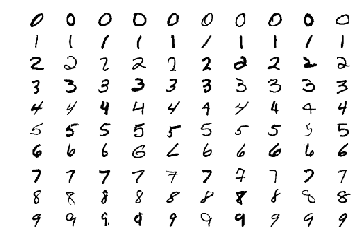

In [47]:
def P1(num_examples=10):

### STUDENT START ###
    examples = []
    # randomly sample 10 examples of each digit
    for i in range(10):
        subset_data = mini_train_data[mini_train_labels == i]
        subset_plots = [j for j in subset_data[np.random.choice(subset_data.shape[0], num_examples, replace = False)]]
        examples = examples + subset_plots
    
    # plot 10 examples of 10 digits
    fig, axs = plt.subplots(10, num_examples)
    for ax, feature in zip(axs.flatten(), examples):
        data = feature.reshape(28,28)
        ax.imshow(data, cmap='Greys')
        ax.axis('off')
### STUDENT END ###
P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [48]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        print("k is set at " + str(k))
        
        # build knn model
        knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
        knn.fit(mini_train_data, mini_train_labels)
        dev_pred = knn.predict(dev_data)
        
        # print classification report for k = 1
        if k==1:
            print(classification_report(dev_labels,dev_pred))
        
        # print error and accuracy rates
        print('Misclassified examples: %d (out of 1000)' % (dev_labels != dev_pred).sum())
        error = (dev_labels != dev_pred).sum()/len(dev_pred)
        print('Prediction error: %.3f' % error)
        print('Prediction accuracy: %.3f'% (1-error))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k is set at 1
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Misclassified examples: 116 (out of 1000)
Prediction error: 0.116
Prediction accuracy: 0.884
k is set at 3
Misclassified examples: 124 (out of 1000)
Prediction error: 0.124
Prediction accuracy: 0.876
k is set at 5
Misclassified

ANSWER: The most difficult digit to predict is 8, with the lowest F1 score at 0.80, which is the weighted average of precision and recall.



### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [4]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    
    # loop through train_sizes
    for i in train_sizes:
        print("Sample size: " + str(i))
        
        # select random sample at current train_size
        idx = np.random.choice(np.arange(len(train_data)), i, replace=False)
        train_data_sample = train_data[idx]
        train_labels_sample = train_labels[idx]
        
        # train knn on current training set
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
        knn.fit(train_data_sample, train_labels_sample)
        
        # start timer
        start = time.time()
        
        # predict using knn model on dev data and report accuracy / error
        dev_pred = knn.predict(dev_data)
        print('Misclassified examples: %d (out of 1000)' % (dev_labels != dev_pred).sum())
        error = (dev_labels != dev_pred).sum()/len(dev_pred)
        print('Prediction error: %.3f' % error)
        print('Prediction accuracy: %.3f'% (1-error))
        
        # end timer and calculate and print duratiion
        end = time.time()
        seconds = end - start
        accuracies.append(1-error)
        print("Evaluation took " + str(seconds) + " seconds")
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Sample size: 100
Misclassified examples: 274 (out of 1000)
Prediction error: 0.274
Prediction accuracy: 0.726
Evaluation took 0.2000110149383545 seconds
Sample size: 200
Misclassified examples: 248 (out of 1000)
Prediction error: 0.248
Prediction accuracy: 0.752
Evaluation took 0.2952759265899658 seconds
Sample size: 400
Misclassified examples: 155 (out of 1000)
Prediction error: 0.155
Prediction accuracy: 0.845
Evaluation took 0.5845019817352295 seconds
Sample size: 800
Misclassified examples: 135 (out of 1000)
Prediction error: 0.135
Prediction accuracy: 0.865
Evaluation took 1.432865858078003 seconds
Sample size: 1600
Misclassified examples: 93 (out of 1000)
Prediction error: 0.093
Prediction accuracy: 0.907
Evaluation took 2.365211009979248 seconds
Sample size: 3200
Misclassified examples: 79 (out of 1000)
Prediction error: 0.079
Prediction accuracy: 0.921
Evaluation took 8.89553165435791 seconds
Sample size: 6400
Misclassified examples: 62 (out of 1000)
Prediction error: 0.062
Pre

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

R squared = 0.4
Predicted accuracies for sample sizes [60000, 120000, 10000000]: [ 1.21559524  1.59338503 63.80277076]
Log transforming x variable: sample size
R squared with log transformation on x = 0.89
Predicted accuracies for log of sample sizes [60000, 120000, 10000000]: [1.02710853 1.0564752  1.24385866]
Odds transforming y variable: accuracy
R squared with odds transformation on y = 0.78
Predicted accuracies for log of sample sizes [60000, 120000, 10000000]: [0.9804604649921967, 0.9894585582363152, 0.9998627955209206]
Log transforming x variable and odds transforming y variable
R squared with odds transformation on y and log transformation on x = 0.96
Predicted accuracies for log of sample sizes [60000, 120000, 10000000]: [0.9596999440184185, 0.9634180049195672, 0.9769735002302855]


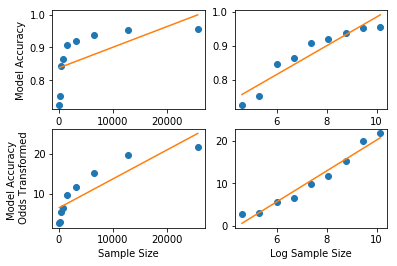

In [29]:
def P4():

### STUDENT START ###
    # reshape data to be used in 1NN and regression
    train_matrix = np.reshape(train_sizes, (-1,1))
    predict_vals = [60000, 120000, 10000000]
    predict_matrix = np.reshape(predict_vals, (-1,1))
    
    # train initial regression on training sizes and accuracies - no transformations
    reg_1 = LinearRegression().fit(train_matrix, accuracies)
    r_squared = reg_1.score(train_matrix, accuracies)
    print("R squared = " + str(round(r_squared,2)))
    b_1 = reg_1.intercept_
    m_1 = reg_1.coef_
    predicted_acc_1 = reg_1.predict(predict_matrix)
    print("Predicted accuracies for sample sizes " + str(predict_vals) + ": " + str(predicted_acc_1))
    
    # take log of training matrix and prediction matrix
    ln_train_matrix = np.log(train_matrix)
    ln_train_sizes = list(np.log(train_sizes))
    ln_predict_matrix = np.log(predict_matrix)
    
    print("Log transforming x variable: sample size")
    
    # run regression using log-transformed x
    reg_2 = LinearRegression().fit(ln_train_matrix, accuracies)
    r_squared_2 = reg_2.score(ln_train_matrix, accuracies)
    print("R squared with log transformation on x = " + str(round(r_squared_2,2)))
    b_2 = reg_2.intercept_
    m_2 = reg_2.coef_
    predicted_acc_2 = reg_2.predict(ln_predict_matrix)
    print("Predicted accuracies for log of sample sizes " + str(predict_vals) + ": " + str(predicted_acc_2))
    
    # odds transform accuracies
    odds_accuracies = [y/(1-y) for y in accuracies]
    
    print("Odds transforming y variable: accuracy")
    
    # run regression using odds-transformed y 
    reg_3 = LinearRegression().fit(train_matrix, odds_accuracies)
    r_squared_3 = reg_3.score(train_matrix, odds_accuracies)
    print("R squared with odds transformation on y = " + str(round(r_squared_3,2)))
    b_3 = reg_3.intercept_
    m_3 = reg_3.coef_
    predicted_acc_3 = reg_3.predict(predict_matrix)
    predicted_acc_3 = [x/(x+1) for x in predicted_acc_3]
    print("Predicted accuracies for log of sample sizes " + str(predict_vals) + ": " + str(predicted_acc_3))
    
    print("Log transforming x variable and odds transforming y variable")
    
    # run regression using log-transformed x and odds-transformed y
    reg_4 = LinearRegression().fit(ln_train_matrix, odds_accuracies)
    r_squared_4 = reg_4.score(ln_train_matrix, odds_accuracies)
    print("R squared with odds transformation on y and log transformation on x = " + str(round(r_squared_4,2)))
    b_4 = reg_4.intercept_
    m_4 = reg_4.coef_
    predicted_acc_4 = reg_4.predict(ln_predict_matrix)
    predicted_acc_4 = [x/(x+1) for x in predicted_acc_4]
    print("Predicted accuracies for log of sample sizes " + str(predict_vals) + ": " + str(predicted_acc_4))
    
    # plot regression lines vs. actuals
    fig, axs = plt.subplots(2,2)
    axs[0,0].plot(train_sizes, accuracies, 'o')
    axs[0,0].plot(train_sizes, m_1*train_sizes + b_1)
    axs[0,0].set_ylabel("Model Accuracy")
    axs[0,1].plot(ln_train_sizes, accuracies, 'o')
    axs[0,1].plot(ln_train_sizes, m_2*ln_train_sizes + b_2)
    axs[1,0].plot(train_sizes, odds_accuracies, 'o')
    axs[1,0].plot(train_sizes, m_3*train_sizes + b_3)
    axs[1,0].set_ylabel("Model Accuracy \n Odds Transformed")
    axs[1,0].set_xlabel ("Sample Size")
    axs[1,1].plot(ln_train_sizes, odds_accuracies, 'o')
    axs[1,1].plot(ln_train_sizes, m_4*ln_train_sizes + b_4)
    axs[1,1].set_xlabel ("Log Sample Size")
    plt.show()
    
### STUDENT END ###

P4()

ANSWER: While the first two models return accuracies above 100% (which is impossible, and a downfall of using regression in both cases), the model with a log-transformed x variable returns much less extremely out-of-bounds predictions. Odds transforming the y variable in the last two models increases the R squared value, and limits the possible predicted variable to [0,1]

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

Misclassified examples: 116 (out of 1000)
Prediction error: 0.116
Prediction accuracy: 0.884
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


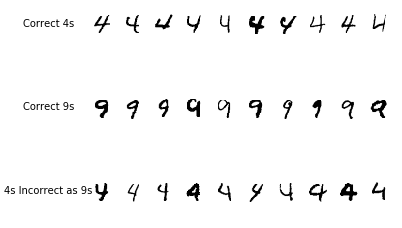

In [271]:
def P5():

### STUDENT START ###
    # build 1NN model, train on mini data
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(mini_train_data, mini_train_labels)
    
    # predict on dev_data using 1NN and report accuracy / error rates
    dev_pred = knn.predict(dev_data)
    print('Misclassified examples: %d (out of 1000)' % (dev_labels != dev_pred).sum())
    error = (dev_labels != dev_pred).sum()/len(dev_pred)
    print('Prediction error: %.3f' % error)
    print('Prediction accuracy: %.3f'% (1-error)) 
    print(confusion_matrix(dev_labels, dev_pred))
    
    # subset correctly labeled 4s, correctly labeled 9s, and incorrectly labeled 4s as 9s
    correct_4 = dev_data[((dev_labels == 4) & (dev_pred == 4))]
    correct_9 = dev_data[((dev_labels == 9) & (dev_pred == 9))]
    incorrect_4_9 = dev_data[((dev_labels == 4) & (dev_pred == 9))]
    
    # randomly select 10 examples from previous subsets
    correct_4_plots = [i for i in correct_4[np.random.choice(correct_4.shape[0], 10, replace = False)]]
    correct_9_plots = [i for i in correct_9[np.random.choice(correct_9.shape[0], 10, replace = False)]]
    incorrect_4_9_plots = [i for i in incorrect_4_9[np.random.choice(incorrect_4_9.shape[0], 10, replace = False)]]

    examples = correct_4_plots + correct_9_plots + incorrect_4_9_plots
    
    # plot randomly selected digit examples
    fig, axs = plt.subplots(3, 10)
    for ax, feature in zip(axs.flatten(), examples):
        data = feature.reshape(28,28)
        ax.imshow(data, cmap='Greys')
        ax.axis('off')
    titles = ['Correct 4s', 'Correct 9s', '4s Incorrect as 9s']
    pad = 10
    for ax, title in zip(axs[:,0], titles):
        ax.annotate(title, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
        xycoords=ax.yaxis.label, textcoords='offset points',
        size='medium', ha='center', va='center')
    fig.subplots_adjust(left=0.2, top=0.95)
    plt.show()
    
### STUDENT END ###

P5()

ANSWER: The most common misclassification is that of 4s incorrectly classified as 9s.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [49]:
def P6():
    
### STUDENT START ###
    # create blur stencil
    blur_stencil = np.full((3,3), 1/9)
    
    
    # build blur function using 1 pad
    def blur_data(img, pad=(1,1)):
        blurred_img = np.zeros((28,28))
        padded_img = np.pad(img.reshape(28, 28), pad,'constant')
        
        for row in range(pad[0], blurred_img.shape[0]):
            for col in range(pad[0], blurred_img.shape[1]):
                blurred_img[row, col] = np.sum(padded_img[row-1:row+2, col-1:col+2] * blur_stencil)
                    
        blurred_img = blurred_img.flatten()
        return blurred_img
    
    # build and train 1NN model, first using non-blurred data
    knn = KNeighborsClassifier(n_neighbors=1)
    
    knn.fit(mini_train_data, mini_train_labels)
    no_filter_acc = knn.score(dev_data, dev_labels)
    print('Accuracy (no blurring): {}'.format(no_filter_acc))
    
    # blur dev data
    blurred_dev = [blur_data(i) for i in dev_data]
    blurred_dev = np.asarray(blurred_dev)
    
    # score using previous 1NN model on blurred dev data
    blurred_dev_acc = knn.score(blurred_dev, dev_labels)
    print('Accuracy (blurred dev data only): {}'.format(blurred_dev_acc))
    
    # blur training data
    blurred_train = [blur_data(i) for i in mini_train_data]
    blurred_train = np.asarray(blurred_train)
    
    # train new 1NN model on blurred training data and score on non-blurred dev data
    knn.fit(blurred_train, mini_train_labels)
    blurred_train_acc = knn.score(dev_data, dev_labels)
    print('Accuracy (blurred training only): {}'.format(blurred_train_acc))
    
    # score 1NN model trained on blurred data with blurred dev data
    print('Accuracy (blurred training and dev): {}'.format(knn.score(blurred_dev, dev_labels)))


### STUDENT END ###

P6()

Accuracy (no blurring): 0.884
Accuracy (blurred dev data only): 0.701
Accuracy (blurred training only): 0.782
Accuracy (blurred training and dev): 0.905


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

Bernoulli NB accuracy: 0.821
Multinomial NB accuracy: 0.818


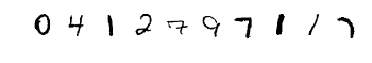

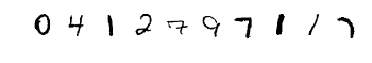

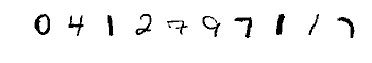

In [34]:
def P7():

### STUDENT START ###

    def bwg(data, white_thresh, black_thresh):
        bwg = np.zeros(data.shape)
        bwg[(data >= white_thresh)] = 1
        bwg[(data > black_thresh)] = 2
        return bwg

    # test thresholds against original data
    examples = mini_train_data[:10]
    fig, axs = plt.subplots(1, 10)
    for ax, feature in zip(axs.flatten(), examples):
        data = feature.reshape(28,28)
        ax.imshow(data, cmap='Greys')
        ax.axis('off')


    def bw_threshold(x, thresh):
        return int(x >= thresh)

    # test black/white threshold level
    bw_thresh = 0.2
    bw = np.vectorize(bw_threshold)
    ex2 = bw(examples, bw_thresh)
    fig, axs = plt.subplots(1, 10)
    for ax, feature in zip(axs.flatten(), examples):
        data = feature.reshape(28,28)
        ax.imshow(data, cmap='Greys')
        ax.axis('off')

    # test black/white/grey threshold levels
    white_thresh = 0.2
    black_thresh = 0.7
    ex3 = bwg(examples, white_thresh, black_thresh)
    ex3 = ex3/2
    fig, axs = plt.subplots(1, 10)
    for ax, feature in zip(axs.flatten(), ex3):
        data = feature.reshape(28,28)
        ax.imshow(data, cmap='Greys')
        ax.axis('off')

    # run naive bayes model against black/white binarization
    binary_nb = BernoulliNB(binarize = bw_thresh)
    binary_nb.fit(mini_train_data, mini_train_labels)
    score = binary_nb.score(dev_data, dev_labels)
    print('Bernoulli NB accuracy: {}'.format(score))

    # run naive bayes against black/white/grey trinarization
    mini_train_trin = bwg(mini_train_data, white_thresh, black_thresh)
    dev_trin = bwg(dev_data, white_thresh, black_thresh)    
    multi_nb = MultinomialNB()
    multi_nb.fit(mini_train_trin, mini_train_labels)
    score = multi_nb.score(dev_trin, dev_labels)
    print('Multinomial NB accuracy: {}'.format(score))

    
### STUDENT END ###

P7()

ANSWER: The multinomial approach does not improve the Naive Bayes model accuracy. This could be due to overfitting, incorrect thresholds in the multinomial model, or perhaps the binomial model provides enough information for accurate predictions, and the multinomial information is not an incremental improvement.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [39]:
def P8(alphas):

### STUDENT START ###
    nb = GridSearchCV(
        BernoulliNB(),
        alphas,
        cv=5,
        scoring='accuracy',
        iid=False
    )
    nb.fit(mini_train_data, mini_train_labels)
    print('Optimized alpha: {}'.format(nb.best_estimator_))
    print('Accuracy at optimized alpha: {}\n'.format(nb.score(dev_data, dev_labels)))
    
    scores = nb.cv_results_['mean_test_score']
    params = list(map(lambda x: list(x.values())[0], nb.cv_results_['params']))
    
    alphas_col = []
    scores_col = []
    for score, param in zip(scores, params):
        alphas_col.append(param)
        scores_col.append(score)
    
    # print a table of the results
    df = pd.DataFrame(list(zip(alphas_col, scores_col)), 
               columns =['Alpha', 'Accuracy'])
    print(df)
    #print(tabulate(rows, headers='keys', tablefmt="github"))

    return nb


### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Optimized alpha: BernoulliNB(alpha=0.001, binarize=0.0, class_prior=None, fit_prior=True)
Accuracy at optimized alpha: 0.823

          Alpha  Accuracy
0  1.000000e-10  0.812702
1  1.000000e-04  0.820818
2  1.000000e-03  0.824850
3  1.000000e-02  0.819848
4  1.000000e-01  0.817818
5  5.000000e-01  0.815816
6  1.000000e+00  0.810779
7  2.000000e+00  0.804802
8  1.000000e+01  0.780584

Best alpha =  {'alpha': 0.001}


ANSWER: The best value for alpha is 0.001. When alpha is near 0, the accuracy is 0.81. It is expected that the best alpha is not zero, since there are pixels that have 0 probability, so some degree of smoothing is necessary to make more accurate predictions.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [38]:
def P9():

### STUDENT END ###
    # generate initial model (no adjustments)
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    # score initial model
    score = gnb.score(dev_data, dev_labels)
    print("Initial accuracy: {}".format(score))

    # adjust var_smoothing variable to smoothe out pixels with 0.00000 probability
    gnb_adj = GaussianNB(var_smoothing=0.1)
    gnb_adj.fit(mini_train_data, mini_train_labels)

    # score with adjusted model
    score_adj = gnb_adj.score(dev_data, dev_labels)
    print("Adjusted accuracy: {}".format(score_adj))


### STUDENT END ###

P9()

Initial accuracy: 0.593
Adjusted accuracy: 0.817


ANSWER: I implemented a `var_smoothing` value in order to smoothe out pixels with 0 probability, as shown in `theta_` and `sigma_`.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

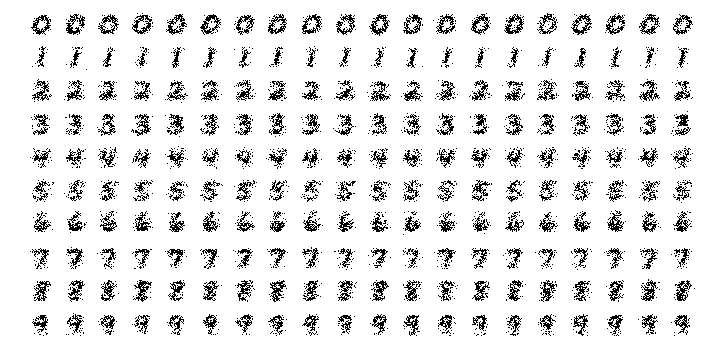

In [35]:
def P10(num_examples):

### STUDENT START ###
    # build bernoulli NB model
    mod = BernoulliNB(binarize=0.2)
    bnb = mod.fit(train_data, train_labels)
    
    # create figure, set size
    fig = plt.figure(figsize=(12, 6))

    for i in range(10):
        for j in range(num_examples):
            # add 10 plots per number
            ax = fig.add_subplot(10, num_examples, i*num_examples + j + 1)
            # determine probability of pixel being > than random number, plot
            pixels = np.exp(bnb.feature_log_prob_)[i] > np.random.rand(784)
            ax.axis('off')
            ax.imshow(pixels.reshape(28,28), cmap=plt.cm.binary, interpolation='nearest')
            

### STUDENT END ###

P10(20)

ANSWER: These generated digits are essentially "averages" of the training data, with some variation, due to the randomly generated data underlying them

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [37]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    mod = BernoulliNB(binarize=0.2, alpha = 0.0000000001)
    bnb = mod.fit(mini_train_data, mini_train_labels)
    pred = bnb.predict(dev_data)
    
    # loop through dev data
    for i in range(np.shape(dev_data)[0]):
        # get posterior probability
        prob = bnb.predict_proba(dev_data[i].reshape(1,-1))
        # get max posterior and predicted label
        max_prob = np.amax(prob)
        pred_label = np.argmax(prob)
        # find bucket max posterior falls into
        # update correct / total counts for correct bucket
        for j in range(len(buckets)):
            if max_prob > buckets[j]:
                continue
            else:
                total[j] += 1
                if pred_label == int(dev_labels[i]):
                    correct[j] += 1
                break
                
    return correct, total
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   2    accuracy = 1.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  34    accuracy = 0.471
p(pred) is 0.9000000000000 to 0.9990000000000    total =  45    accuracy = 0.378
p(pred) is 0.9990000000000 to 0.9999900000000    total =  56    accuracy = 0.643
p(pred) is 0.9999900000000 to 0.9999999000000    total =  59    accuracy = 0.576
p(pred) is 0.9999999000000 to 0.9999999990000    total =  56    accuracy = 0.714
p(pred) is 0.9999999990000 to 0.9999999999900    total =  50    accuracy = 0.740
p(pred) is 0.9999999999900 to 0.9999999999999    total =  46    accuracy = 0.652
p(pred) is 0.9999999999999 to 1.0000000000000    total = 652    accuracy = 0.933


ANSWER: Most of the data points (652 / 1000) fall into the highest max posterior probability bucket, with a very high accuract (0.933). As the max posterior probability increases, so does the accuracy, classifying this Bernoulli Naive Bayes model as weakly calibrated.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()